In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats

data=pd.read_csv("/kaggle/input/irisdata/Iris.csv")
data.head(10)




,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
print(data.shape[0])

150


In [5]:
print(data.columns.tolist())

['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


In [6]:
print(data.dtypes)

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [7]:
#drop Id column
df = data.drop('Id', axis=1) 
print(df)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]


In [8]:

# Select just the rows desired from the 'describe' method and add in the 'median'
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# The str method maps the following function to each entry as a string
df['Species'] =df.Species.str.replace('Iris-', '')

In [10]:
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [11]:
#check for the count of each species
df.Species.value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [12]:
stats_df=df.describe()

stats_df.loc['range']=stats_df.loc['max']-stats_df.loc['min']
print(stats_df)

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000
range       3.600000      2.400000       5.900000      2.400000


In [13]:
#check for null values
null_values = df.isnull()
print(null_values)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            False         False          False         False    False
1            False         False          False         False    False
2            False         False          False         False    False
3            False         False          False         False    False
4            False         False          False         False    False
..             ...           ...            ...           ...      ...
145          False         False          False         False    False
146          False         False          False         False    False
147          False         False          False         False    False
148          False         False          False         False    False
149          False         False          False         False    False

[150 rows x 5 columns]


In [14]:
df_Mean=df.groupby('Species').mean()
df_Mean_median=df.groupby('Species').agg([np.mean, np.median])
df_Mean_median

SepalLengthCm        SepalWidthCm        PetalLengthCm         \
                    mean median         mean median          mean median   
Species                                                                    
setosa             5.006    5.0        3.418    3.4         1.464   1.50   
versicolor         5.936    5.9        2.770    2.8         4.260   4.35   
virginica          6.588    6.5        2.974    3.0         5.552   5.55   

           PetalWidthCm         
                   mean median  
Species                         
setosa            0.244    0.2  
versicolor        1.326    1.3  
virginica         2.026    2.0

[Text(0.5, 0, 'SepalLength in Cm'),
 Text(0, 0.5, 'SepalWidthCm'),
 Text(0.5, 1.0, 'Sepal length with sepal width')]

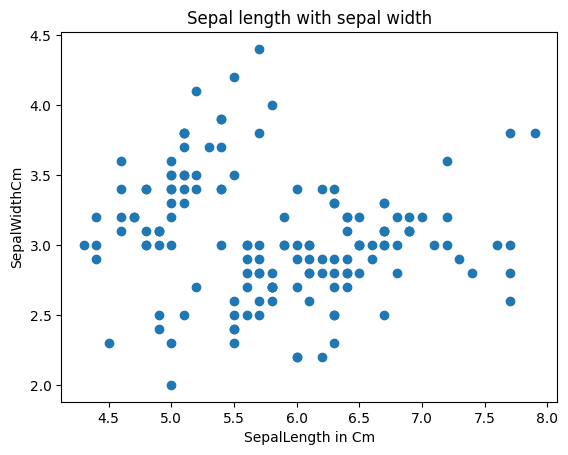

In [22]:
#scatter plot for sepal length and sepal width to check for linear relation
ax=plt.axes()
ax.scatter(df.SepalLengthCm,df.SepalWidthCm)
ax.set(xlabel='SepalLength in Cm',ylabel='SepalWidthCm',title='Sepal length with sepal width')

[Text(0.5, 0, 'SepalLength in Cm'),
 Text(0, 0.5, 'PetalLength in Cm'),
 Text(0.5, 1.0, 'Sepal length with PetalLength')]

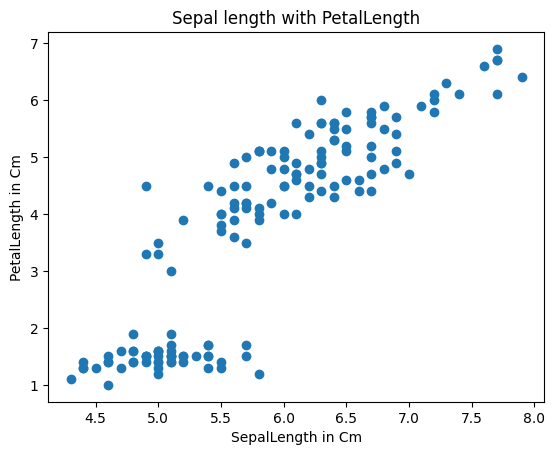

In [24]:
#scatter plot for sepal length and sepal width to check for linear relation
ax=plt.axes()
ax.scatter(df.SepalLengthCm,df.PetalLengthCm)
ax.set(xlabel='SepalLength in Cm',ylabel='PetalLength in Cm',title='Sepal length with PetalLength')

[Text(0.5, 0, 'PetalLength in Cm'),
 Text(0, 0.5, 'PetalWidthCm'),
 Text(0.5, 1.0, 'Petal length with Petal width')]

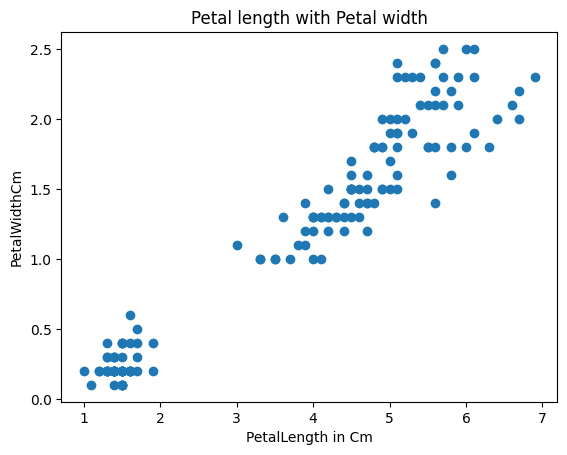

In [25]:

#scatter plot for petal length and petal width to check for linear relation
ax=plt.axes()
ax.scatter(df.PetalLengthCm,df.PetalWidthCm)
ax.set(xlabel='PetalLength in Cm',ylabel='PetalWidthCm',title='Petal length with Petal width')

[Text(0.5, 0, 'SepalWidth in Cm'),
 Text(0, 0.5, 'PetalWidthCm'),
 Text(0.5, 1.0, 'Sepal Width with Petal width')]

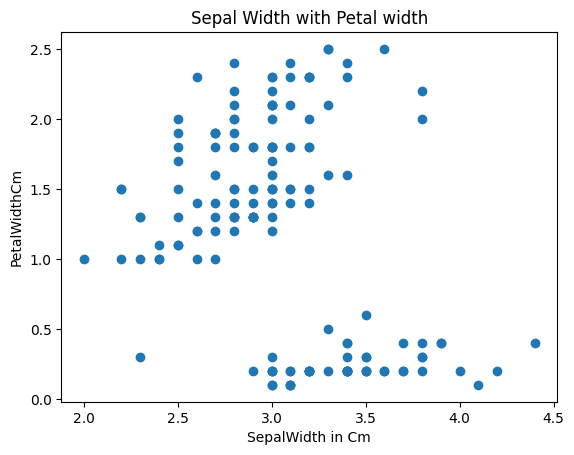

In [26]:
#scatter plot for petal length and petal width to check for linear relation
ax=plt.axes()
ax.scatter(df.SepalWidthCm,df.PetalWidthCm)
ax.set(xlabel='SepalWidth in Cm',ylabel='PetalWidthCm',title='Sepal Width with Petal width')

[Text(0.5, 0, 'Petal Length in Cm'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Distribution of Petal lengths')]

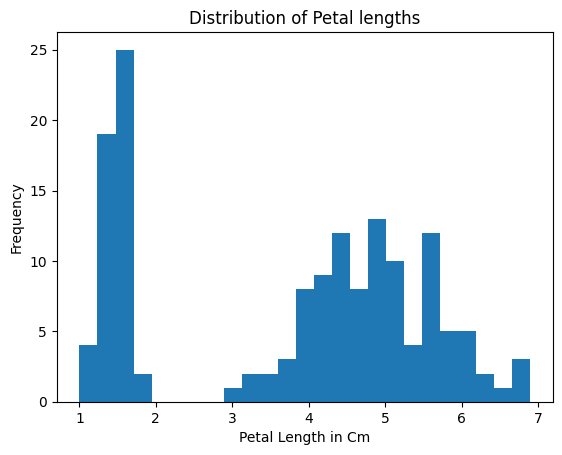

In [27]:
#there is linear relation between petal length and petal width
#there is linear relation between petal length and sepal length

#plot a histogram to check for normality distribution for all 
ax=plt.axes()
ax.hist(df.PetalLengthCm, bins=25)
ax.set(xlabel='Petal Length in Cm',ylabel='Frequency', title='Distribution of Petal lengths')

[Text(0.5, 0, ' Sepal Length in Cm'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Distribution of  Sepal lengths')]

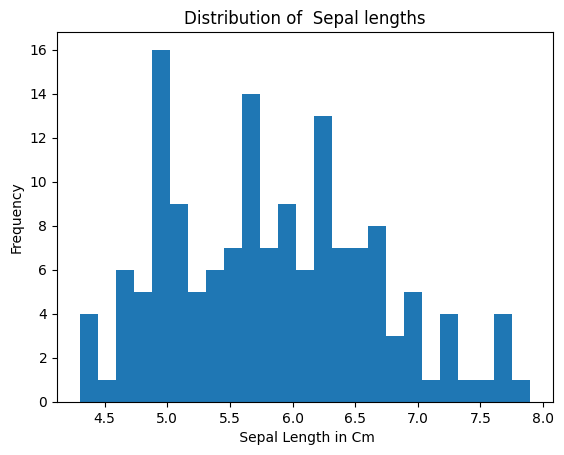

In [28]:

ax=plt.axes()
ax.hist(df.SepalLengthCm, bins=25)
ax.set(xlabel=' Sepal Length in Cm',ylabel='Frequency', title='Distribution of  Sepal lengths')

[Text(0.5, 0, ' Sepal Width in Cm'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Distribution of   Sepal Width')]

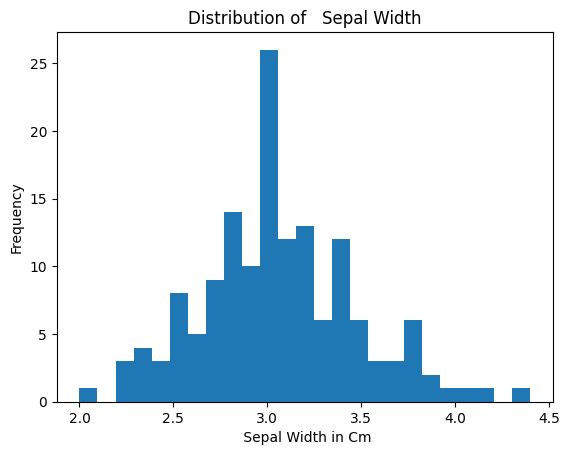

In [29]:


ax=plt.axes()
ax.hist(df.SepalWidthCm, bins=25)
ax.set(xlabel=' Sepal Width in Cm',ylabel='Frequency', title='Distribution of   Sepal Width')

[Text(0.5, 0, 'Petal Width in Cm'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Distribution of Petal Width')]

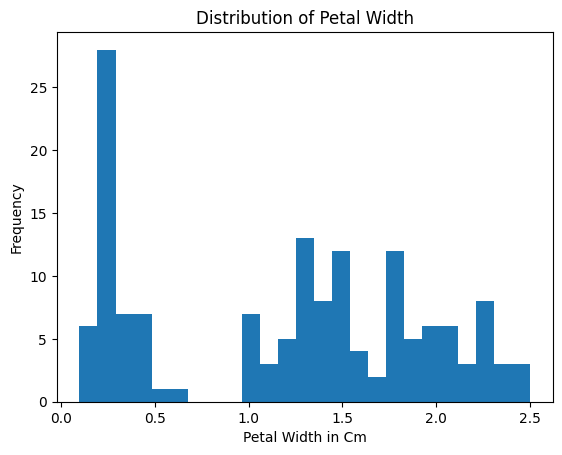

In [31]:
ax=plt.axes()
ax.hist(df.PetalWidthCm, bins=25)
ax.set(xlabel='Petal Width in Cm',ylabel='Frequency', title='Distribution of Petal Width')

array([[<Axes: title={'center': 'PetalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'PetalWidthCm'}, xlabel='[Species]'>],
       [<Axes: title={'center': 'SepalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

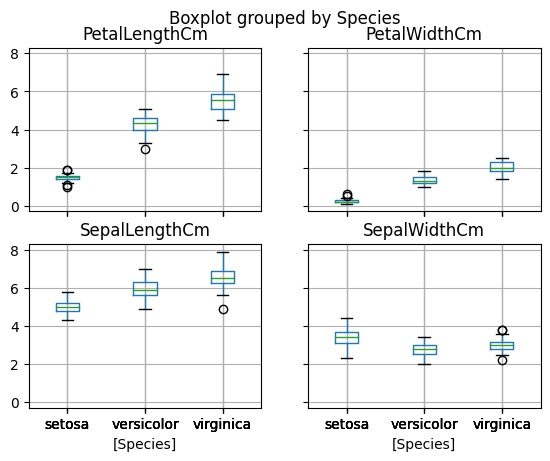

In [30]:
#All follow a normal distribution
#create box plot for each species 
df.boxplot(by='Species')

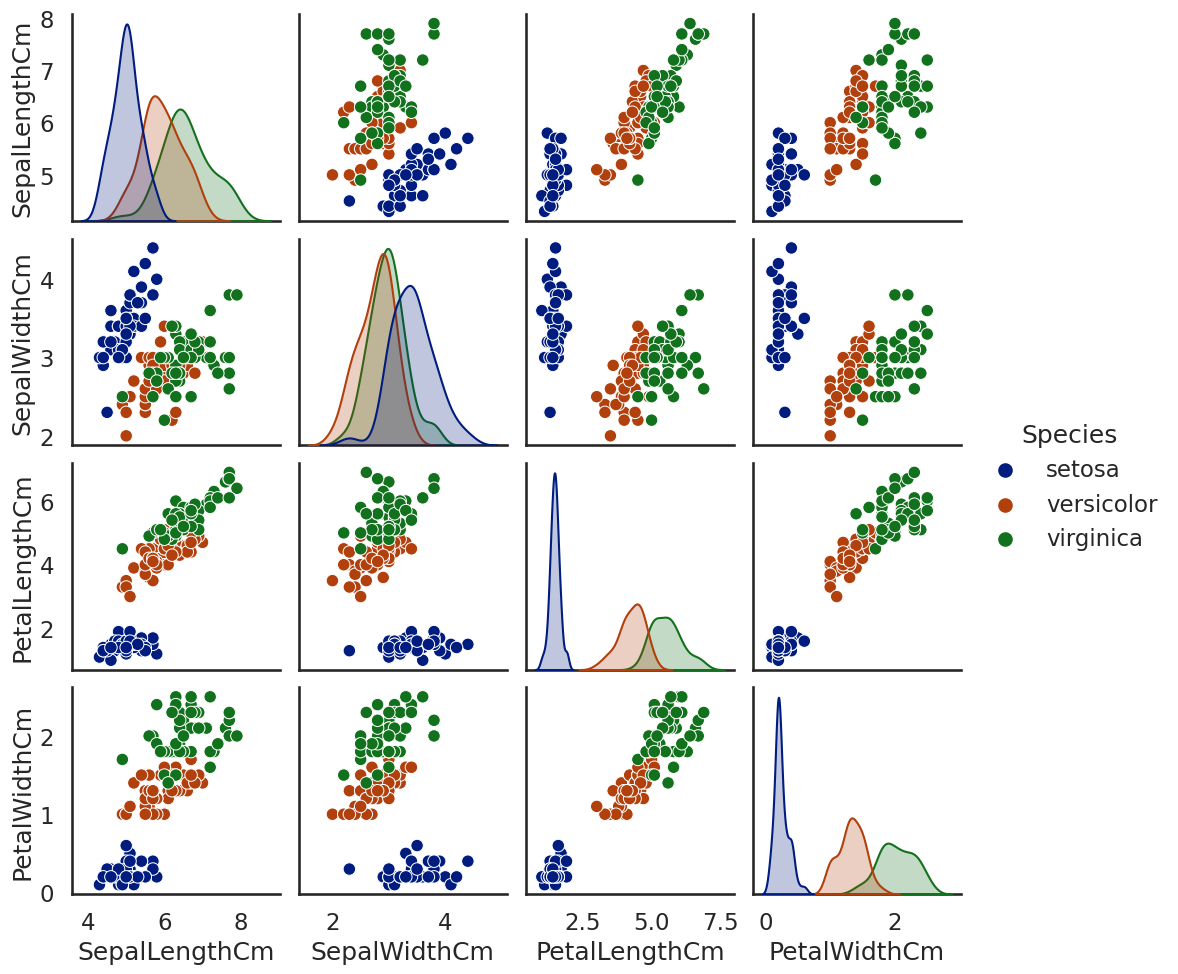

In [32]:
#PAIR PLOT

sns.set_style('white')
sns.set_context('talk')
sns.set_palette('dark')
sns.pairplot(data=df, hue='Species')

In [ ]:
#For Species Setosa all the features are not correlated but sepal length and width are correlated. 
#For Versiclor species petal width and sepal width are correlated, petal width and petal length are linearly correlated.
#Petal length is linearly correlated with sepal length, petal length and sepal width are correlated. Sepal length and sepal width are correlated.
#For virginica species species petal width and sepal width are correlated, petal width and petal length are linearly correlated.
#Petal length is linearly correlated with sepal length, petal length and sepal width are correlated. Sepal length and sepal width are correlated.
# For each of the Species. All the features( petal width ,sepal width, Petal length and sepal length)follow normal distribution.

In [15]:
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#lets separate data from target column

X = df.drop(columns = 'Species') # alternatively we can use >> df.drop('Species' , axis = 1)
Y = df['Species']

X.shape


(150, 4)

In [17]:
Y.shape

(150,)

In [19]:
arr = scaler.fit_transform(X)
X_scaled = pd.DataFrame(arr, columns = X.columns)
X_scaled

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [20]:
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, train_size = 0.75, random_state = 5)

x_train.shape , x_test.shape , y_train.shape , y_test.shape


((112, 4), (38, 4), (112,), (38,))

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , accuracy_score
from sklearn.metrics import multilabel_confusion_matrix





In [27]:
log_model = LogisticRegression(multi_class = 'ovr') 
log_model.fit(x_train , y_train)

LogisticRegression(multi_class='ovr')


In [43]:
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
40,0.194444,0.625000,0.050847,0.083333
115,0.583333,0.500000,0.728814,0.916667
142,0.416667,0.291667,0.694915,0.750000
69,0.361111,0.208333,0.491525,0.416667
17,0.222222,0.625000,0.067797,0.083333
...,...,...,...,...
8,0.027778,0.375000,0.067797,0.041667
73,0.500000,0.333333,0.627119,0.458333
144,0.666667,0.541667,0.796610,1.000000
118,0.944444,0.250000,1.000000,0.916667


In [44]:
x_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
82,0.416667,0.291667,0.491525,0.458333
134,0.500000,0.250000,0.779661,0.541667
114,0.416667,0.333333,0.694915,0.958333
42,0.027778,0.500000,0.050847,0.041667
109,0.805556,0.666667,0.864407,1.000000
57,0.166667,0.166667,0.389831,0.375000
1,0.166667,0.416667,0.067797,0.041667
70,0.444444,0.500000,0.644068,0.708333
25,0.194444,0.416667,0.101695,0.041667
84,0.305556,0.416667,0.593220,0.583333


In [45]:
y_train

40         setosa
115     virginica
142     virginica
69     versicolor
17         setosa
          ...    
8          setosa
73     versicolor
144     virginica
118     virginica
99     versicolor
Name: Species, Length: 112, dtype: object

In [46]:
y_test

82     versicolor
134     virginica
114     virginica
42         setosa
109     virginica
57     versicolor
1          setosa
70     versicolor
25         setosa
84     versicolor
66     versicolor
133     virginica
102     virginica
107     virginica
26         setosa
23         setosa
123     virginica
130     virginica
21         setosa
12         setosa
71     versicolor
128     virginica
48         setosa
72     versicolor
88     versicolor
148     virginica
74     versicolor
96     versicolor
63     versicolor
132     virginica
39         setosa
53     versicolor
79     versicolor
10         setosa
50     versicolor
49         setosa
43         setosa
135     virginica
Name: Species, dtype: object

In [34]:
# Predicting labels on the training dataset
y_pred_train = log_model.predict(x_train)

In [35]:
# Calculating accuracy
accuracy = round(accuracy_score(y_train, y_pred_train), 2)

# Generating a multilabel confusion matrix
conf_mat = multilabel_confusion_matrix(y_train, y_pred_train)

# Generating a classification report
class_rep = classification_report(y_train, y_pred_train)

# Printing the results
print('-' * 100)
print(f'Accuracy of the model on the training data is: {accuracy}')
print('-' * 100)
print(f'Classification Report of the model on training data:\n{class_rep}')
print('-' * 100)
print(f'Multilabel Confusion Matrix:\n\n{conf_mat}')



----------------------------------------------------------------------------------------------------
Accuracy of the model on the training data is: 0.86
----------------------------------------------------------------------------------------------------
Classification Report of the model on training data:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        38
  versicolor       0.92      0.61      0.73        36
   virginica       0.72      0.95      0.82        38

    accuracy                           0.86       112
   macro avg       0.88      0.85      0.85       112
weighted avg       0.88      0.86      0.85       112

----------------------------------------------------------------------------------------------------
Multilabel Confusion Matrix:

[[[74  0]
  [ 0 38]]

 [[74  2]
  [14 22]]

 [[60 14]
  [ 2 36]]]


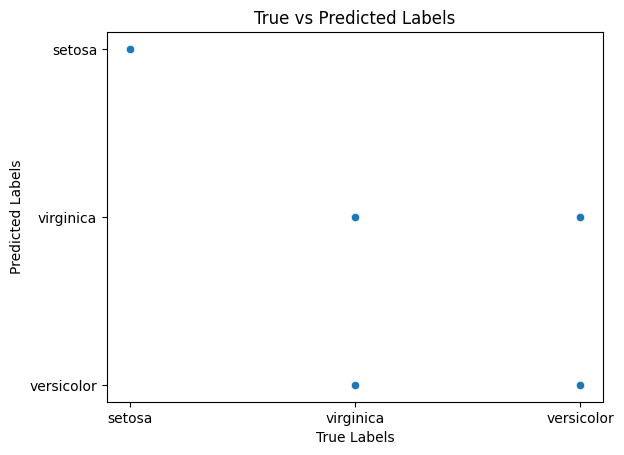

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_train and y_pred_train are Pandas Series or NumPy arrays
df_plot = pd.DataFrame({'True Labels': y_train, 'Predicted Labels': y_pred_train})

# Create a scatter plot
sns.scatterplot(x='True Labels', y='Predicted Labels', data=df_plot)

# Add labels and title
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('True vs Predicted Labels')

# Show the plot
plt.show()


In [49]:
#Accuracy of LogisticRegression Model on Testing Dataset

y_pred = log_model.predict(x_test)

accuracy = round(accuracy_score(y_test , y_pred), 2)

conf_mat = multilabel_confusion_matrix(y_test , y_pred)

class_rep = classification_report(y_test , y_pred)
print(f'Accuracy of model on testing data is: {accuracy}')
print(f'Classification Report of the model on training data:\n{class_rep}')
print(f'Multilabel Confusion Matrix : \n\n {conf_mat}')

Accuracy of model on testing data is: 0.84
Classification Report of the model on training data:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.90      0.64      0.75        14
   virginica       0.69      0.92      0.79        12

    accuracy                           0.84        38
   macro avg       0.86      0.85      0.85        38
weighted avg       0.86      0.84      0.84        38

Multilabel Confusion Matrix : 

 [[[26  0]
  [ 0 12]]

 [[23  1]
  [ 5  9]]

 [[21  5]
  [ 1 11]]]


In [52]:
y_test

82     versicolor
134     virginica
114     virginica
42         setosa
109     virginica
57     versicolor
1          setosa
70     versicolor
25         setosa
84     versicolor
66     versicolor
133     virginica
102     virginica
107     virginica
26         setosa
23         setosa
123     virginica
130     virginica
21         setosa
12         setosa
71     versicolor
128     virginica
48         setosa
72     versicolor
88     versicolor
148     virginica
74     versicolor
96     versicolor
63     versicolor
132     virginica
39         setosa
53     versicolor
79     versicolor
10         setosa
50     versicolor
49         setosa
43         setosa
135     virginica
Name: Species, dtype: object

In [51]:
y_pred

array(['versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'setosa', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'setosa',
       'setosa', 'virginica', 'virginica', 'setosa', 'setosa',
       'versicolor', 'virginica', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'setosa', 'setosa', 'virginica'], dtype=object)

In [50]:
x_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
82,0.416667,0.291667,0.491525,0.458333
134,0.500000,0.250000,0.779661,0.541667
114,0.416667,0.333333,0.694915,0.958333
42,0.027778,0.500000,0.050847,0.041667
109,0.805556,0.666667,0.864407,1.000000
57,0.166667,0.166667,0.389831,0.375000
1,0.166667,0.416667,0.067797,0.041667
70,0.444444,0.500000,0.644068,0.708333
25,0.194444,0.416667,0.101695,0.041667
84,0.305556,0.416667,0.593220,0.583333


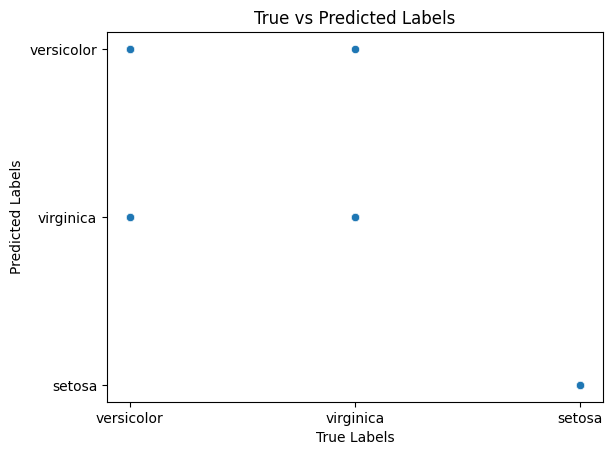

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_train and y_pred_train are Pandas Series or NumPy arrays
df_plot = pd.DataFrame({'True Labels': y_test, 'Predicted Labels': y_pred})

# Create a scatter plot
sns.scatterplot(x='True Labels', y='Predicted Labels', data=df_plot)

# Add labels and title
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('True vs Predicted Labels')

# Show the plot
plt.show()